## ITCR - Escuela de Computación
## Aprendizaje no supervisado 
### Introducción al clustering 
***Profesora: María Auxiliadora Mora***

# Introducción

Los algoritmos de agrupamientos son algoritmos no supervisados que permiten **explorar los datos para encontrar estructuras y relaciones intrínsecas** en ellos utilizando solo vectores de entrada sin hacer referencia a resultados conocidos o etiquetados. 

Muchos algoritmos usan medidas de similitud o distancia entre ejemplos en el espacio de características en un esfuerzo por descubrir regiones densas de observaciones. Por lo que es una buena práctica **escalar los datos antes de usar estos algoritmos**.

La agrupación en clústeres puede ser útil como actividad de análisis de datos para aprender más sobre el dominio del problema, lo que se conoce como descubrimiento de patrones o descubrimiento de conocimiento. Por ejemplo para:

- Realizar segmentación de mercado.
- Etiquetar muestras de forma semi-automática  

Existen varios algoritmos de clustering que pueden ser aplicados al análisis que se desee realizar, cuál seleccionar depende de los datos y el objetivo del ejercicio. 


In [1]:
# Libraries required for the exercise
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot

# datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
import sklearn.datasets

# clustering algorithms 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics


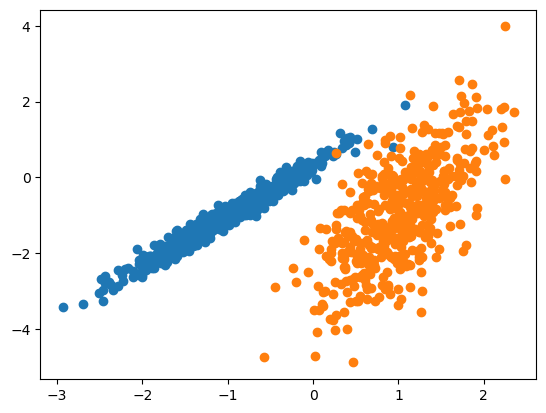

In [2]:
# synthetic classification dataset

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
#X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, random_state=2)

# create scatter plot for samples from each class
for class_value in range(2):
 # get row indexes for samples with this class
 row_ix = np.where(y == class_value)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### Affinity Propagation (AP)

El algoritmo **crea agrupamientos enviando mensajes entre pares de muestras hasta la convergencia**. Luego, se describe un conjunto de datos utilizando una pequeña cantidad de ejemplares, que se identifican como los más representativos de otras muestras. **Los mensajes enviados entre parejas representan la idoneidad de que una muestra sea representante de la otra**, que se actualiza en respuesta a los valores de otras parejas. Esta actualización ocurre iterativamente hasta la convergencia, momento en el que se eligen los ejemplares finales y, por lo tanto, se da el agrupamiento final.

AP elige la cantidad de agrupamientos en función de los datos proporcionados. Para ello, los dos parámetros importantes son la **preferencia**, que controla cuántos ejemplares se utilizan, y el **factor de amortiguamiento** utilizado para evitar oscilaciones numéricas.

El **principal inconveniente de Affinity Propagation es su complejidad**. El algoritmo tiene una **complejidad temporal del orden $O(N^{2}T)$**, donde $N$ es el número de muestras y $T$ es el número de iteraciones hasta la convergencia. Además, la **complejidad de espacio en memoria es del orden $O(N^{2})$** si se usa una matriz de similitud densa, pero reducible si se usa una matriz de similitud dispersa. Esto hace que Affinity Propagation sea más apropiado para **conjuntos de datos de tamaño pequeño a mediano**.

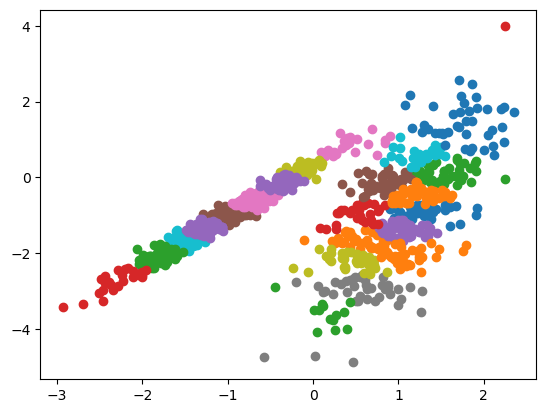

In [3]:

# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [4]:
print("Número de agrupamientos", len(clusters))

# Cluster to which each sample belongs
print(model.labels_)

Número de agrupamientos 25
[ 0 11  1 11 19  9  1 15  2  2  9  5  5  9 18  9  9  6  5  5 14 15  7  5
 19 24  0 14  1 13  8  1 13 12  9 22 23  5 22 18 22  5  6 24  1 21  9 21
 22  5  2  6 19  6 15 21 19  4  8  4 23 14  4 15  6  4  7  6 18  4  0 14
  5 14  2 11 24 11 16  4 23 22  9  4  2  8 20  6  9  4  6 16  8  9 21  2
  6  6  5  4 16  4 21 18  9 10 24  5  0  7 12  9  6 14  0  9  9 14 14  4
 18 19 19 24 20  8 22 10  5 12  8  8 13  8 18  5  9  8 23  9  7  0 13 24
  6 14  6 12  3 21 21  2 11 24 21 13 22 15 12 19  7 19 24  0  4 16 21  5
 20  0 21 23 11  9 10 21 22 24 14  5  0  2 13 21 13  7 19  0 22 21  4 24
 14 14  5 18  5  4 13 11  0  7 23  5  0 18  9 22 21  5  5  8 14  4 21  7
 15 15  7 18  4 18  8 19  5 18 16  1  4  6  7 15  5 19  6 15  0  6  4 24
  6  6  7 15 20  9 16  2  0 23 14  2  5 10 24 22  5 24 24 22 23 22  5 21
 24 14  8  7 14  5  2  5  0 14 24  4 14  6 13 21  6  6  5  6 15 13 20 13
 15 23  5  6 13  8  5  6 15 13 18 10 24 14 20  1 22  1 11  4 18  8  9  9
 11  6  7  6 22 14 22 22

A pesar de que el resultado en este caso no es el óptimo, AP **es recomendado** cuando hay muchos clusters de tamaño desigual. 

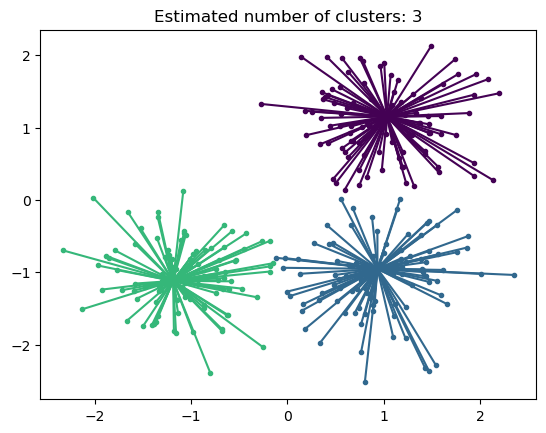

In [20]:
# Ejemplo de Scikit-learn

# The artificial data is created.
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=300, centers=centers, cluster_std=0.5, random_state=0
)

# AP algorithm is applied
af = AffinityPropagation(preference=-50, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


### Agglomerative Clustering

Es una técnica de aprendizaje automático no supervisado que divide la población en varios grupos, de modo que los puntos de datos en el mismo grupo son más similares y los puntos de datos en diferentes grupos son diferentes. **El algoritmo realiza la fusión de muestras cercanas hasta que se logra el número deseado de grupos**. Es parte de una clase más amplia de métodos de **agrupamiento jerárquico**.

El algoritmo aplica un **enfoque de abajo hacia arriba**, de la siguiente forma:

- 1) Inicialmente, cada punto de datos forma un cluster propio
- 2) Se localizan los grupos más cercanos y se unen para formar un solo grupo.
- 3) Se repite recursivamente el paso 2 hasta que obtenga el número deseado de grupos.

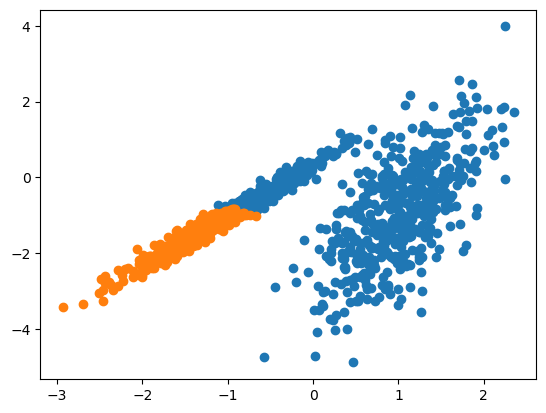

In [6]:
# define the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [7]:
print(clusters)

[0 1]


### BIRCH
BIRCH Clustering (BIRCH es la abreviatura de Balanced Iterative Reducing and Clustering using Hierarchies) implica la construcción de una estructura de árbol de la que se extraen los centroides de los clústeres. 

Es un método de agrupamiento escalable basado en el **agrupamiento jerárquico** y solo requiere un escaneo del conjunto de datos, lo que lo hace rápido para trabajar con conjuntos de datos grandes. Este algoritmo se basa en el árbol CF (clustering features). 

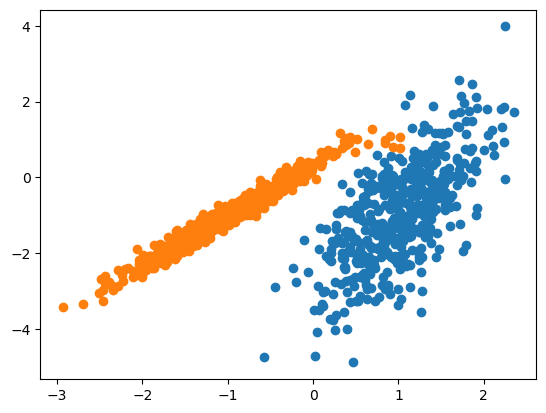

In [9]:
# define the BIRCH model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### DBSCAN
DBSCAN Clustering (donde DBSCAN es la abreviatura de Density-Based Spatial Clustering of Applications with Noise) implica encontrar áreas de alta densidad en el dominio y expandir esas áreas del espacio de características a su alrededor como clústeres.

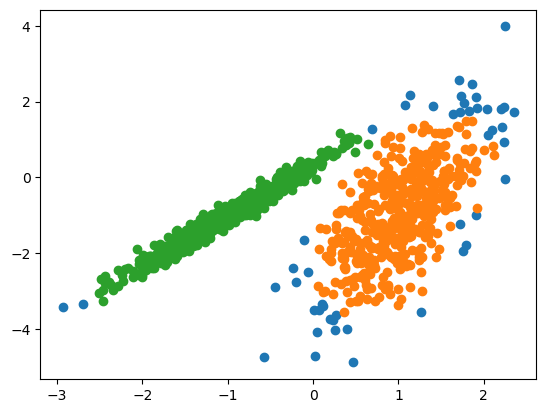

In [13]:
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In [59]:
print(clusters)

[-1  0  1]


### K-Means

K-Means es el algoritmo de agrupación en clústeres más conocido e implica la asignación de muestras a los clústeres en un esfuerzo por minimizar la varianza dentro de cada clúster. Para la asignación de utilizan medidas de distancia y en cada iteración se asigna cada muestra al centroide más cercano. 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fe7cc4fe040>
Traceback (most recent call last):
  File "/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mmora/anaconda3/envs/ml_env/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


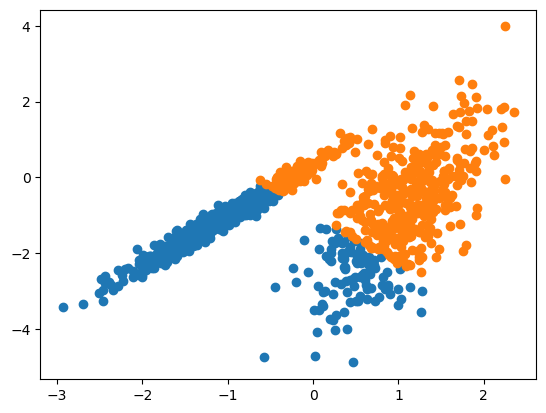

In [14]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### Gaussian Mixture Model
Un modelo de mezcla gaussiana calcula una función de densidad de probabilidad multivariada con una mezcla de distribuciones de probabilidad gaussianas

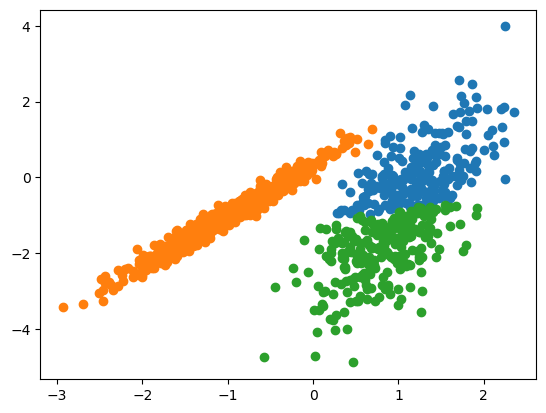

In [16]:
# define the Gaussian Mixture Model model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### Ejemplo con el dataset de Irises

El dataset tiene el inconveniente de que las muestras de dos especies no se separan bien con las características seleccionadas por lo que la mejor separación de un algoritmo de clustering puede ser dividir el conjunto de datos en dos grupos.

Se cargan los datos, se aplica PCA para disminuir la dimensionalidad y poder visualaizar los datos y se prueban los algoritmos. 

In [19]:
# carga un dataset
iris = sklearn.datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

#La PCA se ve afectado por la diferencia de escala de los datos, 
#por lo que deben escalar las características antes de aplicar PCA. 
#Para más información sobre escalamiento pueden consultar (Scikit-learn, 2023)
X_zscaled = (X_iris - X_iris.mean()) / X_iris.std(ddof=1)

# carga Y o target
# Primero el valor numérico de la clase
Y = pd.DataFrame(iris.target, columns=['target'])

# Asociar el id de la clase con el nombre
Y['species'] = Y.apply(lambda r: iris.target_names[r])

print("Ejemplo de muestras del conjunto de datos:")
print(X_iris.head(7))
print(Y.head(7))

tiposEspecies = np.unique(Y['species'] )
print("Especies distintas: ", tiposEspecies)

print("Tamaño del dataframe: ", X_zscaled.shape)
print(X_zscaled)

Ejemplo de muestras del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
   target species
0       0  setosa
1       0  setosa
2       0  setosa
3       0  setosa
4       0  setosa
5       0  setosa
6       0  setosa
Especies distintas:  ['setosa' 'versicolor' 'virginica']
Tamaño del dataframe:  (150, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.0156

In [20]:
# Se calcula los auto-valores y auto-vectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(X_zscaled.cov())

# Se normalizan los datos
eigenvalues_normalized = eigenvalues / eigenvalues.sum()

# Se calcula la varianza explicada
# Devuelve la suma acumulativa de los elementos a lo largo de un eje dado. 
cumvar_explained = np.cumsum(eigenvalues_normalized)

print("Auto-valores:")
print(eigenvalues)

print("Auto-vectores:")
print( eigenvectors)

print("Auto-valores normalizados:")
print(eigenvalues_normalized)

print("Varianza explicada acumulada:")
print( cumvar_explained )

Auto-valores:
[2.91849782 0.91403047 0.14675688 0.02071484]
Auto-vectores:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Auto-valores normalizados:
[0.72962445 0.22850762 0.03668922 0.00517871]
Varianza explicada acumulada:
[0.72962445 0.95813207 0.99482129 1.        ]


In [21]:
# Proyecta los datos
T = pd.DataFrame(X_zscaled.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, Y.species], axis=1)



In [22]:

X_iris_pca = T.iloc[:, 0:2]
print(X_iris_pca)

          pc1       pc2
0   -2.257141 -0.478424
1   -2.074013  0.671883
2   -2.356335  0.340766
3   -2.291707  0.595400
4   -2.381863 -0.644676
..        ...       ...
145  1.864258 -0.385674
146  1.559356  0.893693
147  1.516091 -0.268171
148  1.368204 -1.007878
149  0.957448  0.024250

[150 rows x 2 columns]


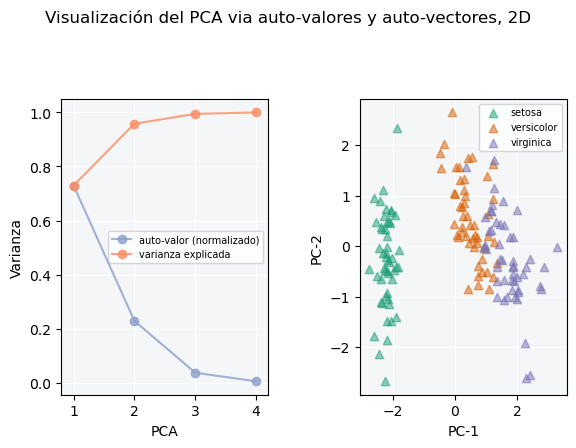

In [23]:
#########################################
# Primer gráfico
#########################################
# Separa por la etiqueta 
irises = [T[T.species=='setosa'], 
          T[T.species=='versicolor'], 
          T[T.species=='virginica']]

# define un color por especie
colors = ['#1b9e77', '#d95f02', '#7570b3']

_, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

#########################################
# Segundo gráfico
#########################################
# Usa solo dos componentes principales, pc1 y pc2
for group, color in zip(irises, colors):
    ax2.scatter(group.pc1,
                group.pc2,
                marker='^',
                color=color,
                label=group.species,
                alpha=0.5,
                zorder=1000)
ax2.set_xlabel(r'PC-1')
ax2.set_ylabel(r'PC-2')
ax2.grid(color='#fdfefe')
ax2.set_facecolor('#f4f6f7')
ax2.legend(labels=iris.target_names, fontsize=7)

plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show()    

## Aplicación de algoritmos de clustering a los datos de Iris

### Evaluación de los resultados

**Rand index**: si se dispone de las clases verdaderas, se utiliza el índice Rand que  mide la similitud de las asignaciones (la pureza), ignorando las permutaciones de las clases.

Los valores más bajos indican que hay diferencias en la separación de clases, las agrupaciones similares tienen un índice Rand alto. 1.0 es la puntuación de coincidencia perfecta.


**Homogeneity, completeness and V-measure**

- **Homogeneidad**: cada grupo contiene solo miembros de una sola clase.

- **Completitud**: todos los miembros de una clase determinada se asignan al mismo grupo.

- **V-measure**: Su media armónica llamada V-measure

In [25]:
# Ejemplo Rand

# Se permutan las clases pero la asignación es buena.
# etiquetas de 4 registros
# sklearn.metrics.rand_score(labels_true, labels_pred)
print("---------------- Rand -----------------")
print(metrics.rand_score([0, 0, 1, 1], [1, 1, 0, 0]))

# la asignación mezcla miembros de clases.
print(metrics.rand_score([0, 0, 1, 2], [0, 0, 1, 1]))

# homogeneidad 
print("---------------- homogeneidad -----------------")
print(metrics.homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0]))

print(metrics.homogeneity_score([0, 0, 1, 2], [0, 0, 1, 1]))

# Completitud 
print("---------------- Completitud -----------------")

print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

print(metrics.completeness_score([0, 0, 1, 2], [0, 0, 1, 1]))


---------------- Rand -----------------
1.0
0.8333333333333334
---------------- homogeneidad -----------------
1.0
0.6666666666666666
---------------- Completitud -----------------
1.0
0.9999999999999999


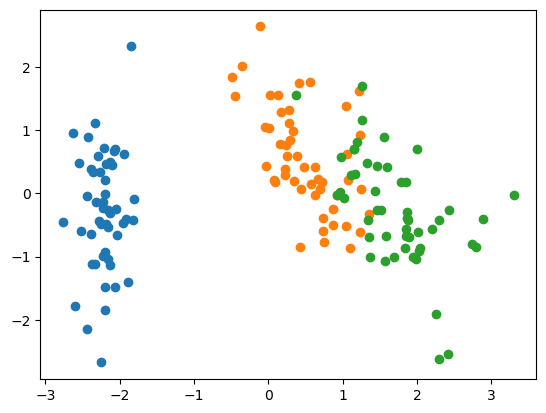

In [26]:
X_iris_pca_np = X_iris_pca.to_numpy() 
y_iris_np = np.squeeze(Y.iloc[:, 0:1].to_numpy()) 
# create scatter plot for samples from each class
for class_value in range(3):
 # get row indexes for samples with this class
 row_ix = np.where(y_iris_np == class_value)
 # create scatter of these samples
 pyplot.scatter(X_iris_pca_np[row_ix, 0], X_iris_pca_np[row_ix, 1])
# show the plot
pyplot.show()

[0 1 2 3 4 5 6 7 8]


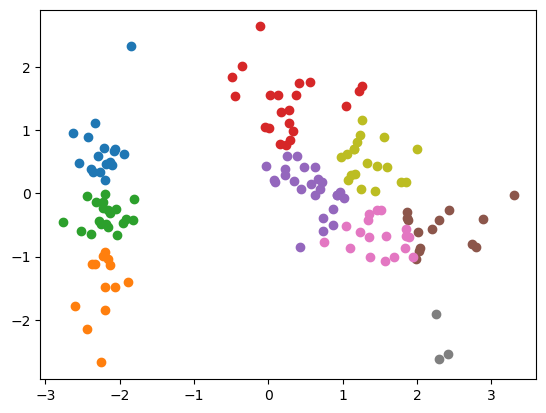

In [27]:
# Affinity propagation define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X_iris_pca_np)
# assign a cluster to each example
yhat = model.predict(X_iris_pca_np)
# retrieve unique clusters

clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
print(clusters)

for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X_iris_pca_np[row_ix, 0], X_iris_pca_np[row_ix, 1])
# show the plot
pyplot.show()

In [28]:
# Evaluation Affinity propagation

# similarity of the two assignments, ignoring permutations.
print("Rand", metrics.rand_score(y_iris_np, yhat))

# each cluster contains only members of a single class.
print("Homogeneidad", metrics.homogeneity_score(y_iris_np, yhat))

# all members of a given class are assigned to the same cluster.
print("Completitud", metrics.completeness_score(y_iris_np, yhat))

# Their harmonic mean called V-measure
print("V measure", metrics.v_measure_score(y_iris_np, yhat))


Rand 0.7493512304250559
Homogeneidad 0.7803833559959336
Completitud 0.40497669466639447
V measure 0.5332338843498455


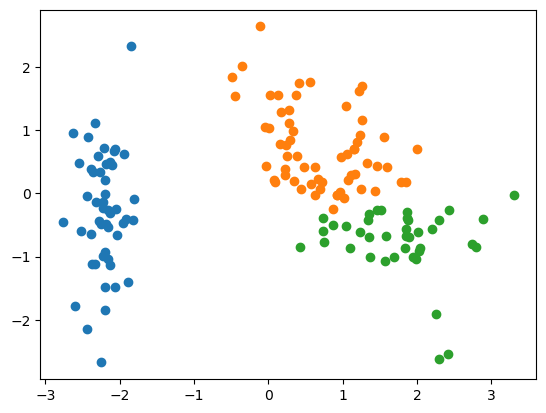

In [29]:
# define the Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X_iris_pca_np)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X_iris_pca_np[row_ix, 0], X_iris_pca_np[row_ix, 1])
# show the plot
pyplot.show()

In [30]:
# Evaluation Agglomerative Clustering 

# similarity of the two assignments, ignoring permutations.
print("Rand", metrics.rand_score(y_iris_np, yhat))

# each cluster contains only members of a single class.
print("Homogeneidad", metrics.homogeneity_score(y_iris_np, yhat))

# all members of a given class are assigned to the same cluster.
print("Completitud", metrics.completeness_score(y_iris_np, yhat))

# Their harmonic mean called V-measure
print("V measure", metrics.v_measure_score(y_iris_np, yhat))


Rand 0.8157494407158836
Homogeneidad 0.6379665044883762
Completitud 0.6475541971933072
V measure 0.642724597293161


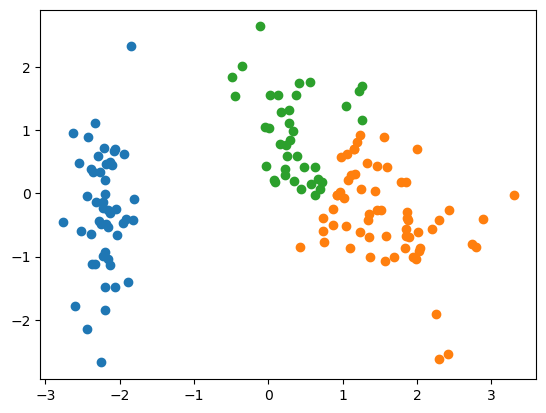

In [31]:
# define the BIRCH model
model = Birch(threshold=0.01, n_clusters=3)
# fit the model
model.fit(X_iris_pca_np)
# assign a cluster to each example
yhat = model.predict(X_iris_pca_np)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X_iris_pca_np[row_ix, 0], X_iris_pca_np[row_ix, 1])
# show the plot
pyplot.show()

In [32]:
# Evaluation BIRCH

# similarity of the two assignments, ignoring permutations.
print("Rand", metrics.rand_score(y_iris_np, yhat))

# each cluster contains only members of a single class.
print("Homogeneidad", metrics.homogeneity_score(y_iris_np, yhat))

# all members of a given class are assigned to the same cluster.
print("Completitud", metrics.completeness_score(y_iris_np, yhat))

# Their harmonic mean called V-measure
print("V measure", metrics.v_measure_score(y_iris_np, yhat))


Rand 0.8679194630872483
Homogeneidad 0.7281425116063388
Completitud 0.7412238960734305
V measure 0.7346249737691951


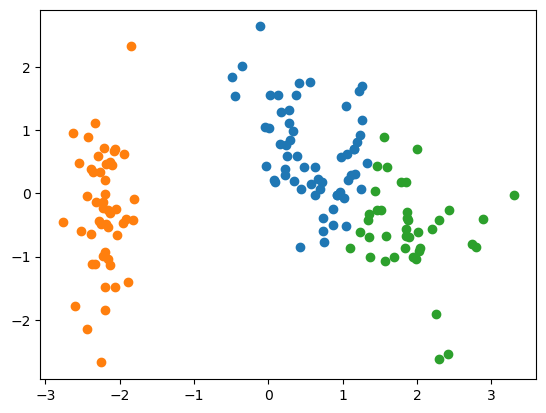

In [33]:
# define the Gaussian Mixture Model model
model = GaussianMixture(n_components=3)
# fit the model
model.fit(X_iris_pca_np)
# assign a cluster to each example
yhat = model.predict(X_iris_pca_np)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = np.where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(X_iris_pca_np[row_ix, 0], X_iris_pca_np[row_ix, 1])
# show the plot
pyplot.show()

In [34]:
# Evaluation Gaussian Mixture Model

# similarity of the two assignments, ignoring permutations.
print("Rand", metrics.rand_score(y_iris_np, yhat))

# each cluster contains only members of a single class.
print("Homogeneidad", metrics.homogeneity_score(y_iris_np, yhat))

# all members of a given class are assigned to the same cluster.
print("Completitud", metrics.completeness_score(y_iris_np, yhat))

# Their harmonic mean called V-measure
print("V measure", metrics.v_measure_score(y_iris_np, yhat))


Rand 0.8797315436241611
Homogeneidad 0.7450433680741836
Completitud 0.7542594807722844
V measure 0.749623099014085


# Referencias 

- [1] Brownlee, J. (2020). 10 Clustering Algorithms With Python. Recuperado de https://machinelearningmastery.com/clustering-algorithms-with-python/

- [2] scikit-learn (2019). Supervised learning. Recuperado de https://scikit-learn.org/stable/modules/clustering.html

- [3] Verma, Y (2021). Guide To BIRCH Clustering Algorithm(With Python Codes). Recuperado de https://analyticsindiamag.com/guide-to-birch-clustering-algorithmwith-python-codes/#:~:text=BIRCH%20is%20a%20scalable%20clustering,structured%20summary%20to%20create%20clusters.

